In [1]:
import numpy as np
import pandas as pd

import pickle

from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns

In [3]:
#
# The analysis information is stored as a list with the following items:
#
# [
#  [
#     map_results,
#     global_accuracy,
#     map_accuracy,
#     map_error,   
#   ],
#   towers,
#   traces,
#   aggregated_data,
# ]
#
for tmp in list(glob('./evaluate/.tmp*')[:1]):
    pass
#     analysis = pickle.load(open(tmp, 'rb'))

In [4]:
figsize=(4, 4)

def plot_all(evaluation):
    plot_accuracy_dist(evaluation['analysis'])
    plot_error_dist(evaluation['analysis'])
    
    plot_number_towers_dist(evaluation['simulator_traces'], 'simulated')
    plot_number_towers_dist(evaluation['recovered_traces'], 'recovered')

def plot_accuracy_dist(analysis):
    fig, ax = plt.subplots(figsize=figsize)
    map_accuracy_results = analysis[0][2] / 24
    sns.distplot(
        pd.Series(map_accuracy_results),
        bins=np.arange(0, 1.01, 0.05),
        kde=False,
        ax=ax,
    )
    ax.set(xlim=(0, 1));
    ax.set(xlabel='Accuracy', ylabel='# Users')
    plt.savefig(f"./accuracy_dist_{path.split('_m_')[1][:-4]}.png", dpi=300)

def plot_error_dist(analysis):
    fig, ax = plt.subplots(figsize=figsize)
    map_error_results = analysis[0][3] / 24
    sns.distplot(
        pd.Series(map_error_results),
        kde=False,
        ax=ax,
    )
    ax.set(xlabel='Error', ylabel='# Users')
    plt.savefig(f"./error_dist_{path.split('_m_')[1][:-4]}.png", dpi=300)

def plot_number_towers_dist(traces, trace_type):
    fig, ax = plt.subplots(figsize=figsize)
    unique_visited_towers = np.array([len(np.unique(trace)) for trace in traces])
    sns.distplot(
        unique_visited_towers,
        kde=False,
        ax=ax,
    )

    ticks = np.arange(unique_visited_towers.min(), unique_visited_towers.max() + 1, 1).astype(np.int)
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set(xlabel=f'# Towers in {trace_type} trace', ylabel='# Users')
    plt.savefig(f"./{trace_type}_number_towers_dist_{path.split('_m_')[1][:-4]}.png", dpi=300)

    unique_visited_towers.mean()

# 16 users and 16 towers

In [15]:
path = './evaluate/.tmp_eval_m_random_direction_u_16_t_16_v_(0.01, 0.01).pkl'
evaluation = pickle.load(open(path, 'rb'))

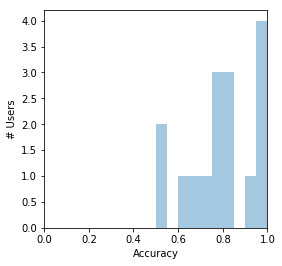

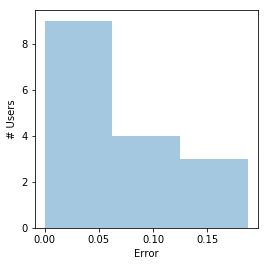

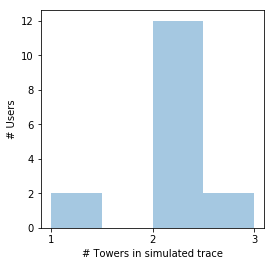

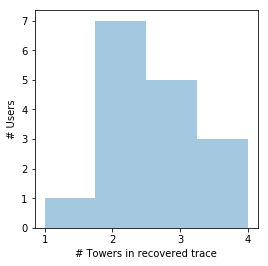

In [16]:
plot_all(evaluation)

# 16 users and 576 towers

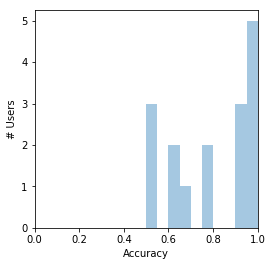

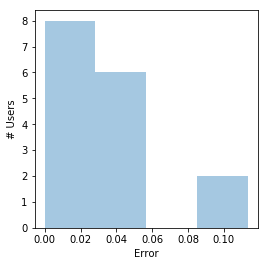

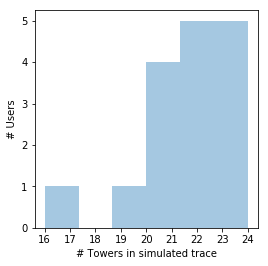

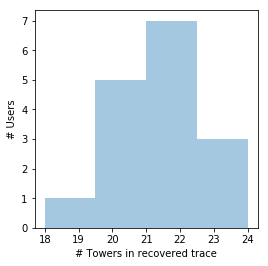

In [44]:
path = './evaluate/.tmp_eval_m_random_direction_u_16_t_576_v_(0.05, 0.05).pkl'
evaluation = pickle.load(open(path, 'rb'))

plot_all(evaluation)

# 576 users and 576 towers

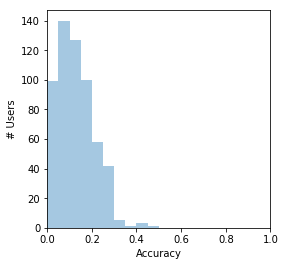

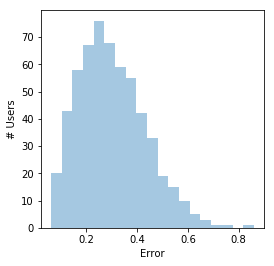

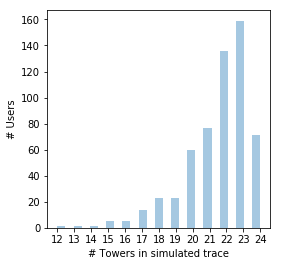

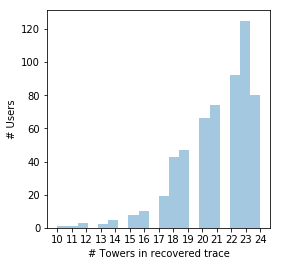

In [31]:
path = './evaluate/.tmp_eval_m_random_direction_u_576_t_576_v_(0.05, 0.05).pkl'
evaluation = pickle.load(open(path, 'rb'))

plot_all(evaluation)

In [45]:
from tracer.towers import TowersManager

In [46]:
evaluation.keys()

dict_keys(['analysis', 'simulator_towers', 'simulator_traces', 'simulator_aggregated_data', 'recovered_costs', 'recovered_distribution', 'recovered_traces'])

In [47]:
tm = TowersManager(evaluation['simulator_towers'])

In [50]:
np.argmin(evaluation['analysis'][0][2])

6

User 6 mapped to simulated trace 2
[506 530 554 530 530 506 482 458 435 436 413 390 367 344 345 322 299 276
 228 205 182 158 135 135]
[554 553 553 528 504 505 482 458 435 436 413 390 367 344 345 322 299 276
 277 253 229 204 179 155]
[False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True False False False False False False]
12


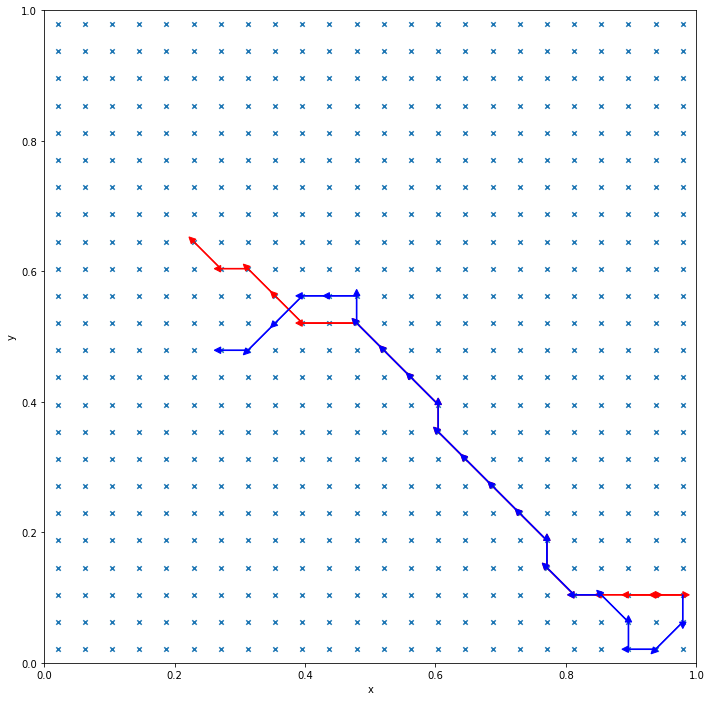

In [55]:
user = np.argmin(evaluation['analysis'][0][2])
recovered_trace = evaluation['recovered_traces'][user]
user_mapped_trace = evaluation['analysis'][0][0][user]
print(f'User {user} mapped to simulated trace {user_mapped_trace}')
mapped_trace = evaluation['simulator_traces'][user_mapped_trace]

print(recovered_trace)
print(mapped_trace)
print(recovered_trace == mapped_trace)
print(np.sum(recovered_trace == mapped_trace))

tm.plot_user_mapping_trace(recovered_trace, mapped_trace, annotate_towers=False)

In [57]:
np.set_printoptions(threshold=np.nan)

In [65]:
print(evaluation['simulator_aggregated_data'][0])

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [73]:
evaluation['recovered_traces'][:,0]

array([245, 455, 554, 318, 523,  76, 506,  39, 343,   6, 554,  81, 306,
       255, 363, 419])

In [74]:
evaluation['recovered_traces'][:,1]

array([268, 455, 553, 341, 523,  52, 530,  16, 342,  30, 529, 105, 281,
       279, 387, 467])

In [75]:
evaluation['recovered_distribution'][0]

array([  6,  39,  76,  81, 245, 255, 306, 318, 343, 363, 419, 455, 506,
       523, 554, 554])

In [76]:
evaluation['recovered_distribution'][1]

array([ 16,  30,  52, 105, 268, 279, 281, 341, 342, 387, 455, 467, 523,
       529, 530, 553])

In [64]:
evaluation['recovered_costs'][1]

array([[0.61941953, 0.37730771, 0.33592741, 0.30046261, 0.05892557,
        0.41874482, 0.50173311, 0.16666667, 0.17179607, 0.26352314,
        0.82073815, 0.45069391, 0.74185391, 0.52704628, 0.5153882 ,
        0.56672794],
       [0.804717  , 1.00173461, 1.03497853, 0.82495791, 0.8436857 ,
        0.44292274, 0.38414769, 0.76829537, 0.72767705, 0.83748964,
        0.        , 0.50173311, 0.20833333, 0.93169499, 0.8907316 ,
        0.94004285],
       [1.12190933, 0.93169499, 0.8789593 , 0.8436857 , 0.50689688,
        0.73715858, 0.80039053, 0.39528471, 0.41036908, 0.29462783,
        0.89945971, 0.41036908, 0.71321845, 0.05892557, 0.04166667,
        0.04166667],
       [0.68338414, 0.5       , 0.4658475 , 0.39528471, 0.11785113,
        0.38414769, 0.4658475 , 0.05892557, 0.04166667, 0.1767767 ,
        0.73833521, 0.32542707, 0.63601406, 0.42898459, 0.41036908,
        0.4658475 ],
       [0.88388348, 0.99390504, 1.0086432 , 0.82179512, 0.75115652,
        0.44876373, 0.42491829, 

In [ ]:
evaluation['recovered_costs'][1]